# Self-Introduction

**Name: Muhamad Fikri Mumtaz**

**Batch: HCK-004**

----

### Background Problem

Mr.Atkinson has started his own mobile company. But, He does not know how to estimate the price of the mobiles his company creates. In today's competitive mobile phone market, you can't just make assumptions. To solve this problem, he collects sales data from various companies' mobile phones.

Mr.Atkinson is curious about the relationship between a mobile phone's features and its selling price. However, he is not very good at Machine Learning. So he needs your help to solve this problem. He doesn't need you to predict actual price but a price range indicating how high the price is.

### Problem Statement

Mobile Phones Price Prediction Based on it's Features and Selling Price with Supervised Machine Learning.

Objective:

- Proportion of Mobile Price Range

- The Correlation between variabel to Mobile Price Range

- The count of all variable to Mobile Price Range

----

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For Feature Selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold

#For Encoding

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Evaluate classification Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# For Making Pipeline
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer

# For using GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#save model
import joblib

# Data Loading

In [2]:
df = pd.read_csv(r'D:\Hacktiv8\Milestone\Milestone 3\h8dsft_P1M2_Muhamad_Fikri_Mumtaz.csv')

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.duplicated().sum()

0

There isn't any duplicated data.

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is also no Missing Values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.shape

(2000, 21)

There are 2000 non null data with 19 int types data and 2 float types data. Total of 2000 Rows and 21 Columns data.

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Column Description:

- battery_power: Battery Capacity

- blue: Does it have Bluetooth? (0 = No, 1 = Yes)

- clock_speed: The Speed of Processor to Execute it's programs

- dual_sim: Does it Support a Dual Sim? (0 = No, 1 = Yes)

- fc = Front Camera Resolution (MegaPixel)

- four_g = Does it Support 4G? (0 = No, 1 = Yes)

- int_memory = Internal Memory Capacity (GigaByte)

- m_dep = Mobile Depth (cm)

- mobile_wt = Mobile Weight (gram)

- n_cores = Numbers of Core Processor

- pc = Primary Camera Resolution (MegaPixel)

- px_height = Height Pixel Resolution (px)

- px_width = Width Pixel Resolution (px)

- ram = Total Ram on Mobile (MegaByte)

- sc_h = Mobile Screen Height (cm)

- sc_w =  Mobile Screen Width (cm)

- talk_time = Longest time that a single battery charge will last when you are in calls (Hour)

- three_g = Does it Support 3G? (0 = No, 1 = Yes)

- touch_screen = Does it Support Touch Screen (0 = No, 1 Yes)

- wifi = Does it Support Wifi (0 = No, 1 = Yes)

- Price_range:

    - `0` = Low Cost

    - `1` = Medium Cost

    - `2` = High Cost

    - `3` = Very High Cost

In [9]:
df1 = df.drop(['price_range'],axis=1)

In [10]:
cat_cols = ['blue', 'dual_sim','four_g','three_g','touch_screen','wifi']
num_cols = [i for i in df1 if i not in cat_cols]

----

# Exploratory Data Analysis

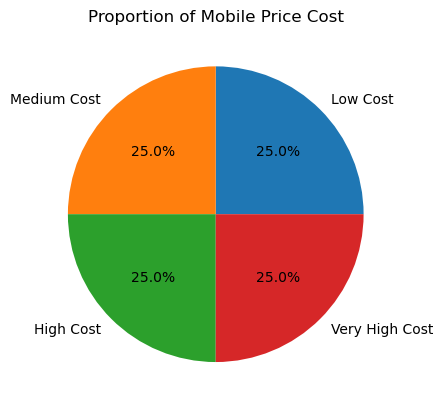

In [11]:
default_counts = df['price_range'].value_counts()
plt.pie(default_counts, labels=['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'], autopct='%1.1f%%')
plt.title('Proportion of Mobile Price Cost')
plt.show()

There are total of 4 kind of price range that is:

- Low Cost that have a 25% proportion.

- Medium Cost that have a 25% proportion.

- High Cost that have a 25% proportion.

- Very High Cost that have a 25% proportion.

The proportion of price range are split evenly to 4 kind of range.

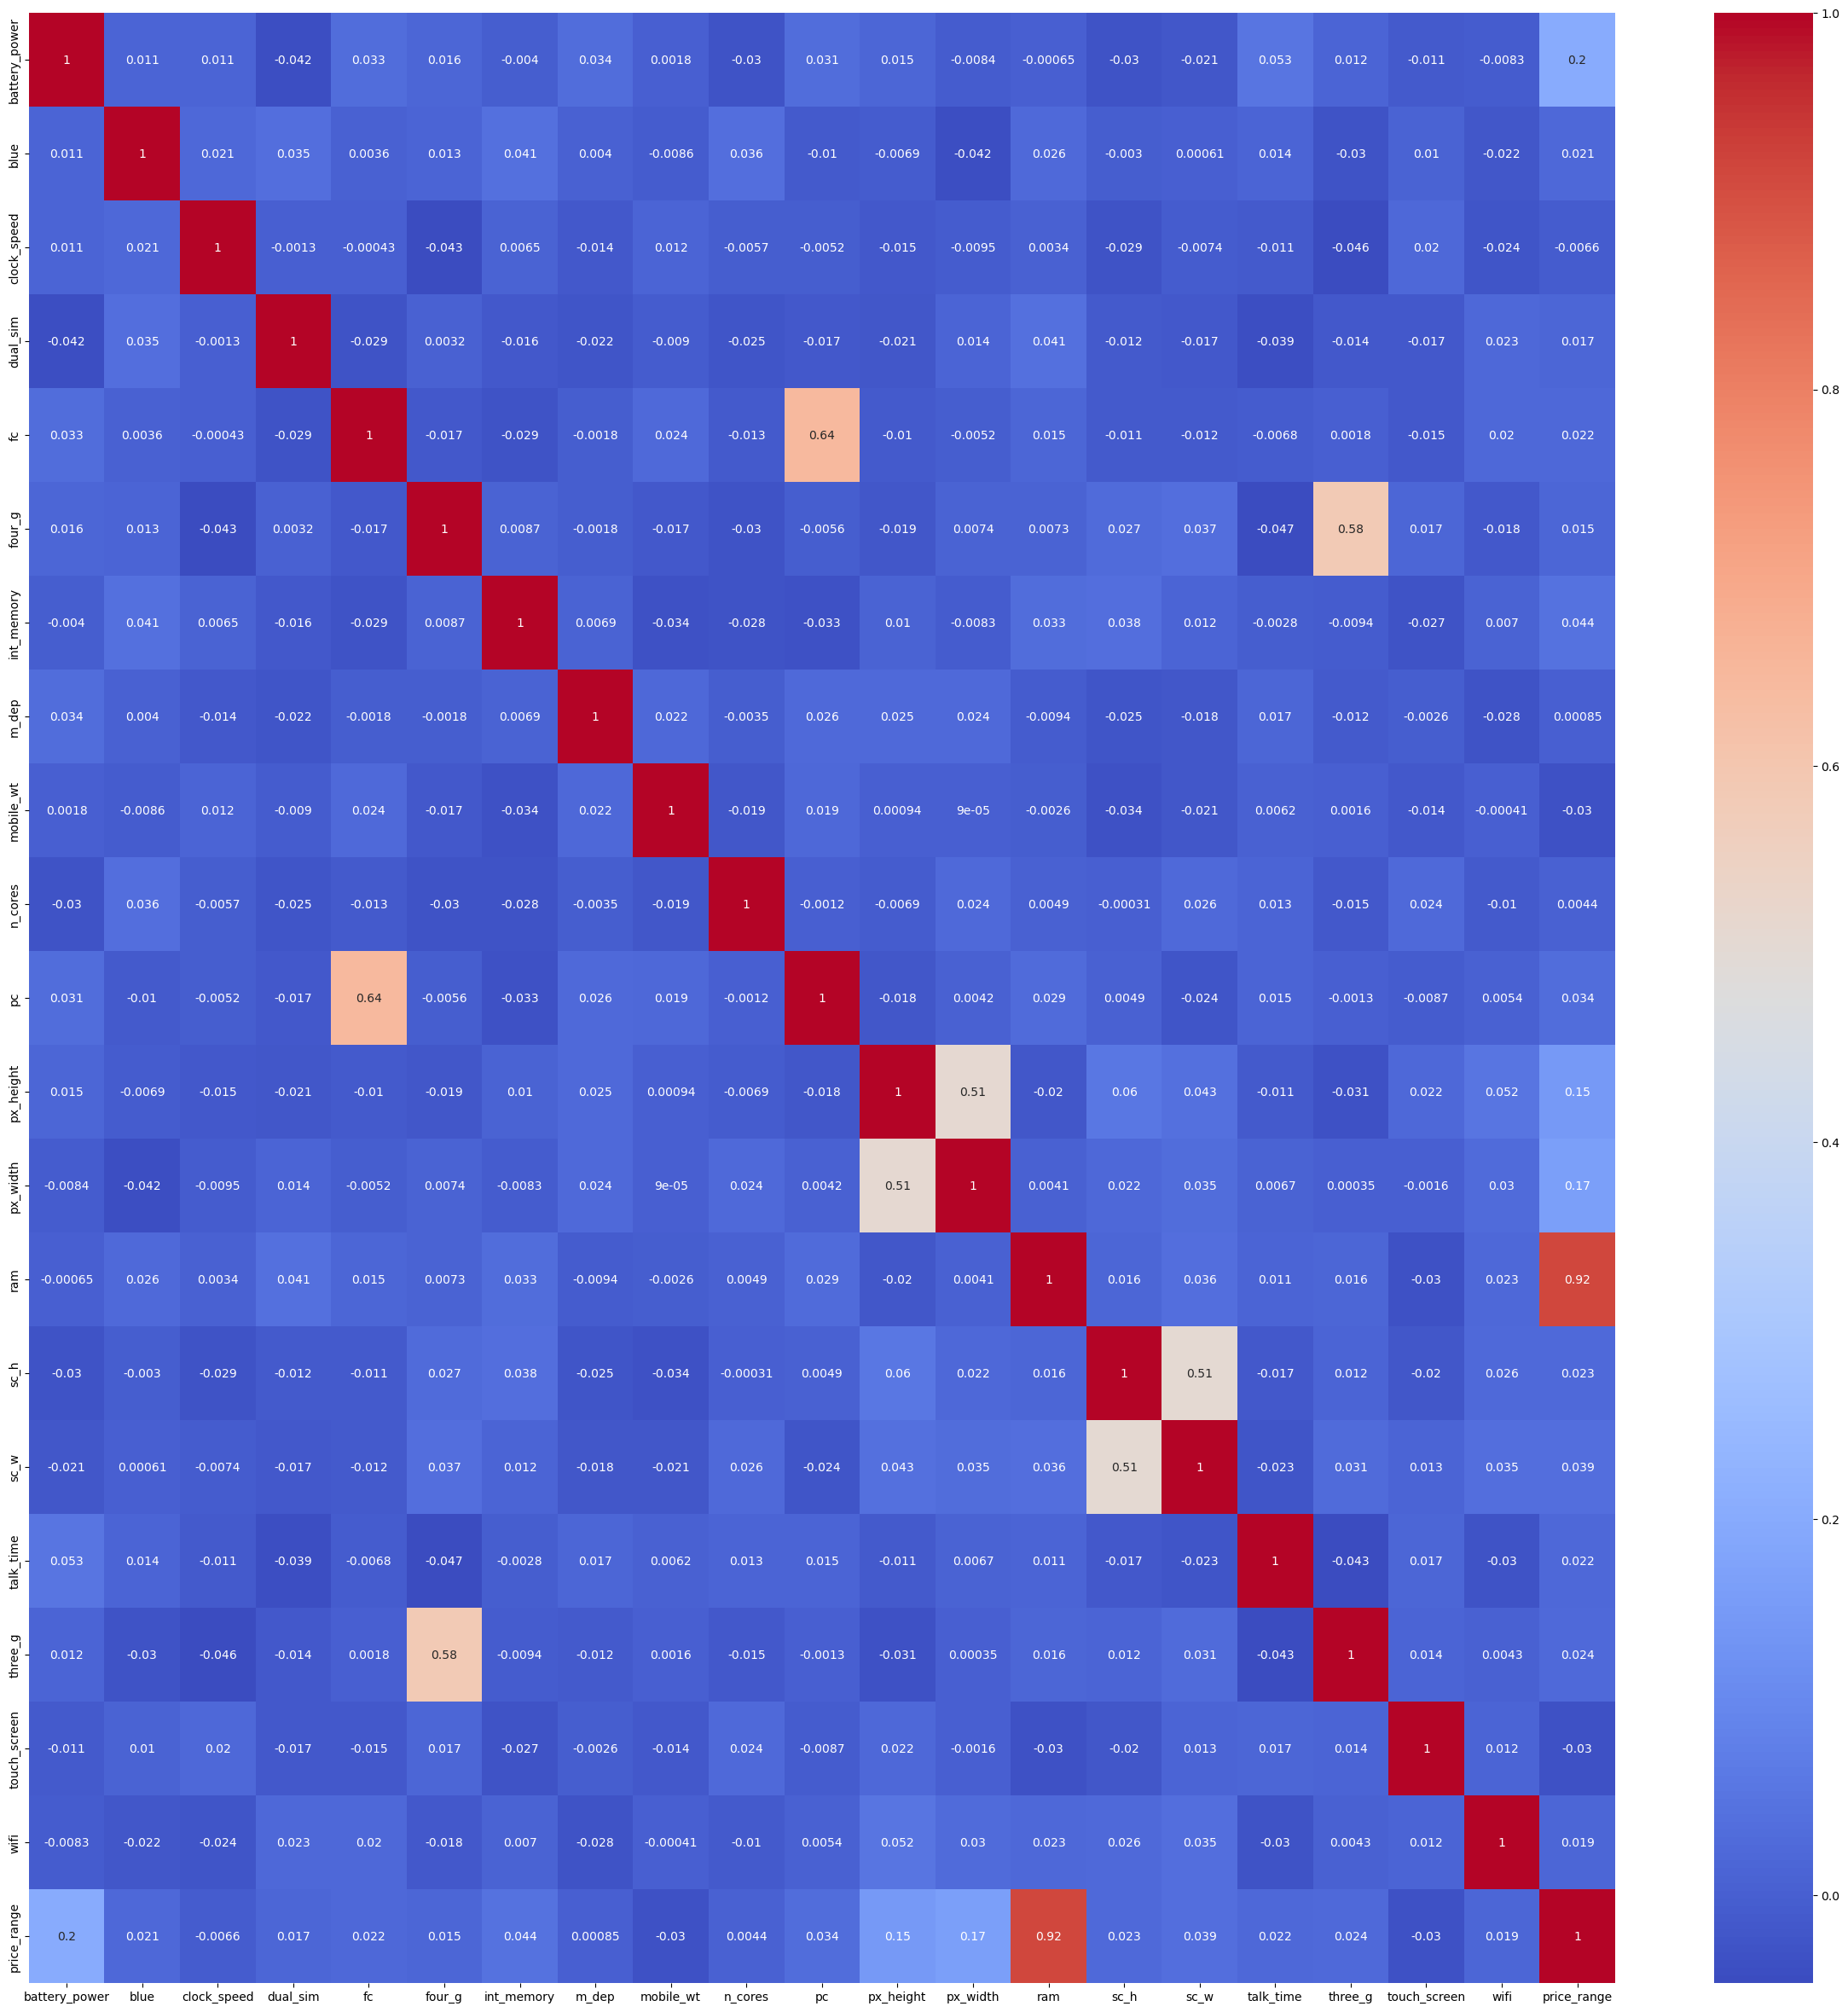

In [12]:
fig, axes = plt.subplots(figsize=(30,30)) #Width, height in inches
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

As seen from correlation map above that there are atleast 5 variable that have some correlation to the price_range that is:

1. battery_power,
2. ram,
3. px_height,
4. px_weight,
5. int_memory

In [13]:
df_eda = df.copy()

In [14]:
df_eda['PRICE_CLASSIFICATION'] = df['price_range'].map({0: 'Lower Price', 1: 'Lower Price', 2:'Higher Price', 3: 'Higher Price'})

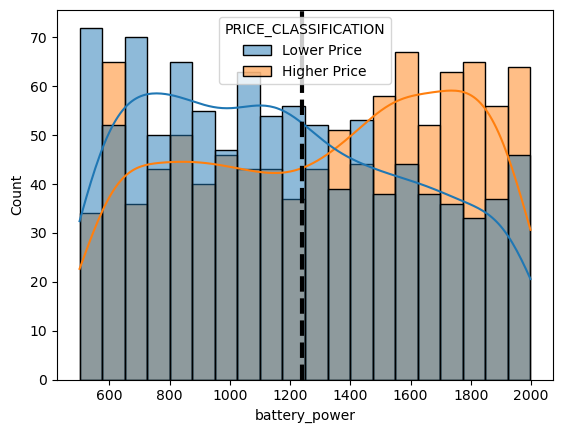

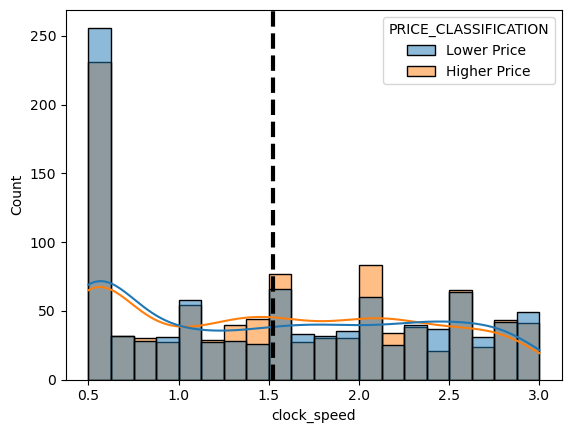

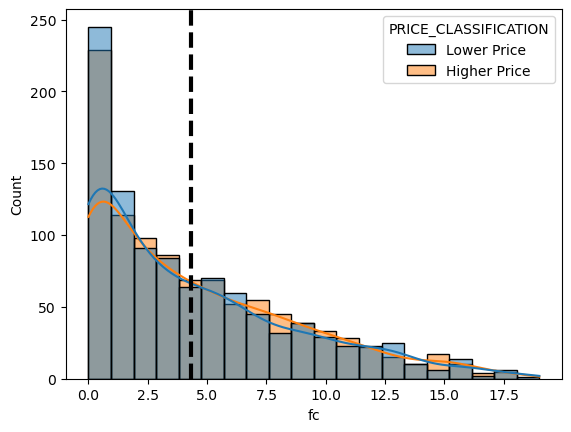

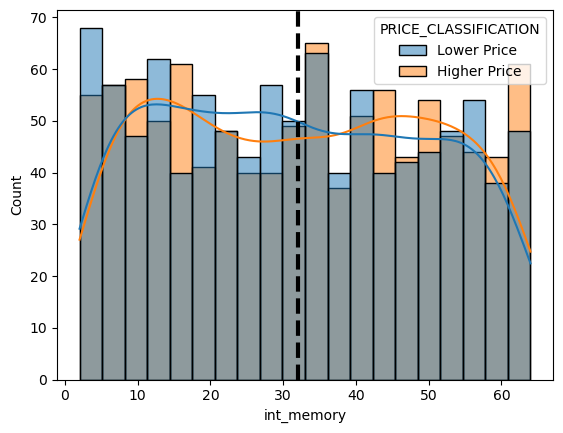

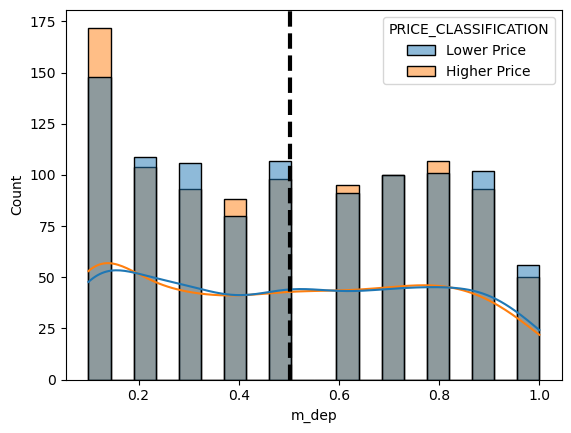

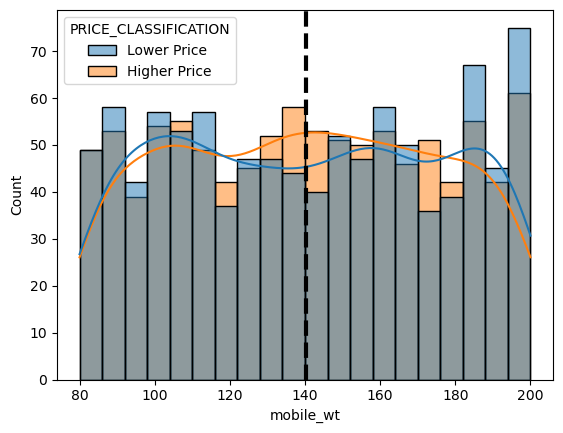

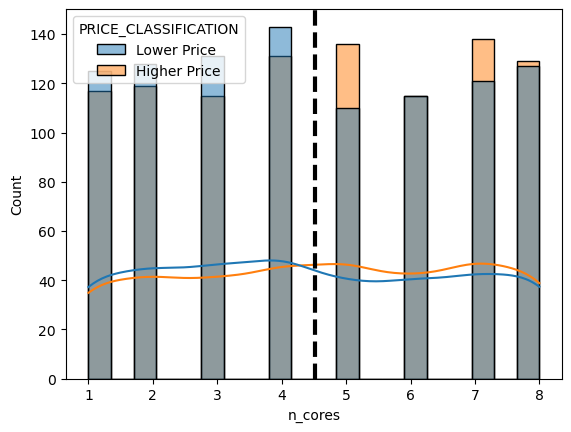

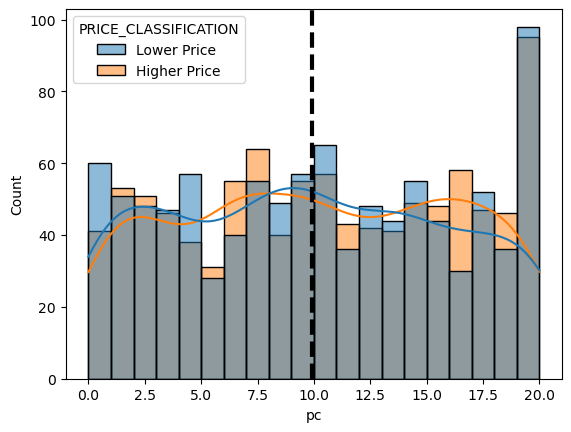

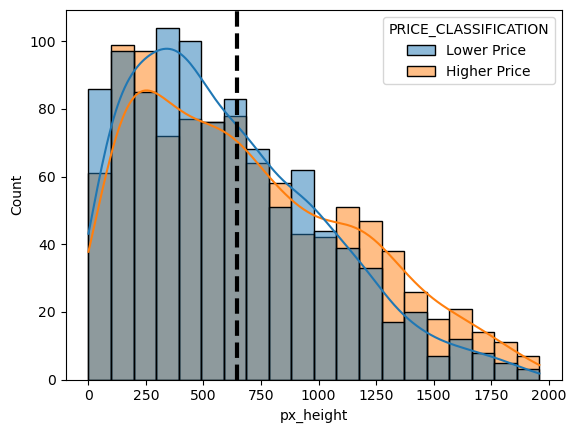

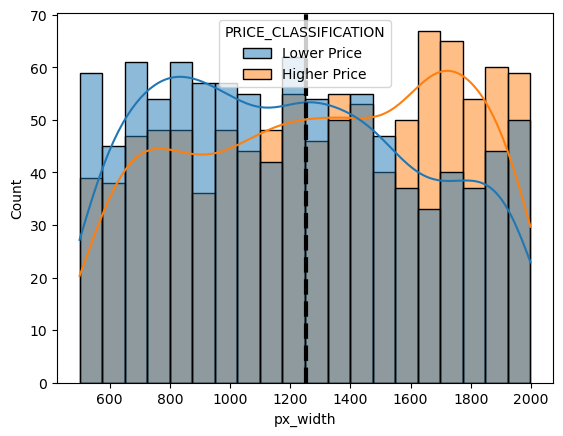

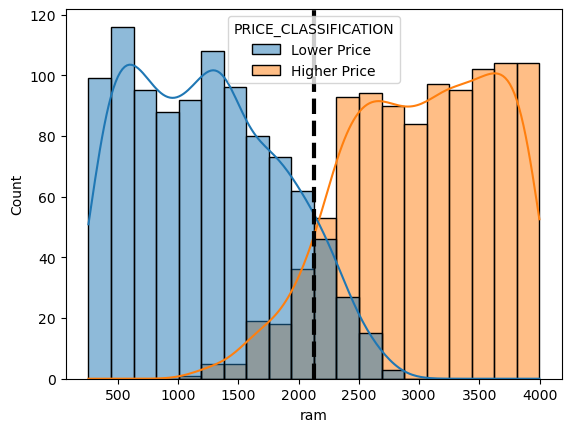

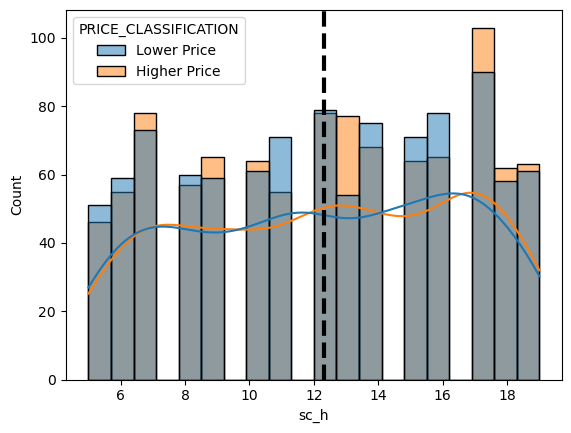

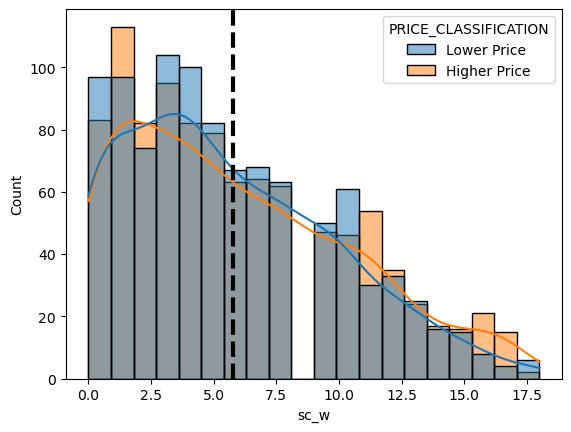

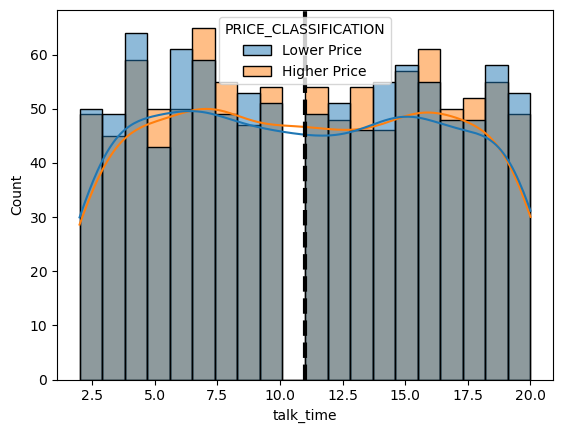

In [15]:
for col in num_cols:
    fig, ax = plt.subplots()
    sns.histplot(data=df_eda, x=col, hue='PRICE_CLASSIFICATION', kde=True, bins=20, ax=ax)
    mean = df[col].mean()
    ax.axvline(mean, color='black', linestyle='dashed', linewidth=3)
    plt.show()

As seen from plot above we know that:

- `Battery Power`: The average battery phone are 1200 mAh. Phones that have low price are have smaller battery power in capacity compared to medium and high price that have more balanced battery power, and majority of very high price phones have bigger than average battery power.

- `Clock Speed`: Clock speed have an average 0f 1.5 and majority of clock speed are below average. This mean that clock speed doesn't differ much between low to very high price phones as it isn't and important feature of mobile thus lower to higher clock speed doesn't affect the price that much.

- `Front Camera`: Front camera have an average of 4 MP resolution and majority of front camera resolution are below average. This mean that front camera doesn't differ much between low to very high price phones as it isn't and important feature of mobile thus lower to higher resolution doesn't affect the price that much.

- `Internal Memory`: have an average of 32 GB of Memory. Low price phones have peaked at 28 GB, while Medium price phone have about 42 GB, High price have about 12 GB, and lastly the Very High price phone have a peak about 48.

- `Mobile Depth`: have an average of 0.5 cm thickness. Lower thickness have a better popularity than above that.

- `Mobile Weight`: have an average of weight of about 180 grams. Lower weight than an average have higher price popularity while higher weight have lower price popularity.

- `Number of Cores`: have an average of 4 to 5 cores. Apparently the number of cores doesn't affect price that much as lower or higher of cores have the more or less the same price popularity.

- `Primary Camera`: have an average of 10 MP of resolution. Higher the resolution have higher price popularity.

- `Pixel Height`: have an average of 600 height pixel. Lower than an average height pixel have the majority of the price popularity but higher height pixel Higher price popularity.

- `Pixel Width`: have an average of 1280 width pixel. Lower than an average width pixel have medium to low price popularity, meanwhile higher than an average width pixel have high to very high price popularity.

- `RAM`: also known as Random Access Memory have an average of 2080 MB. have distinct cluster of price. Higher the price have bigger RAM.

- `Screen Height`: have an average of 12 cm. Higher the screen height the Higher the price.

- `Screen Width`: have an average of 6 cm. Lower the screen height have bigger popularity than Higher screen height.

- `Talk Time`: have an average of 11 Hours. Have balanced popularity between price. That means Lower or Higher average talk time doesn't affect the price pretty much.

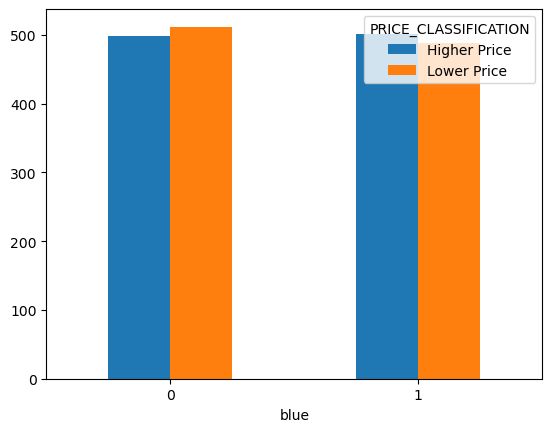

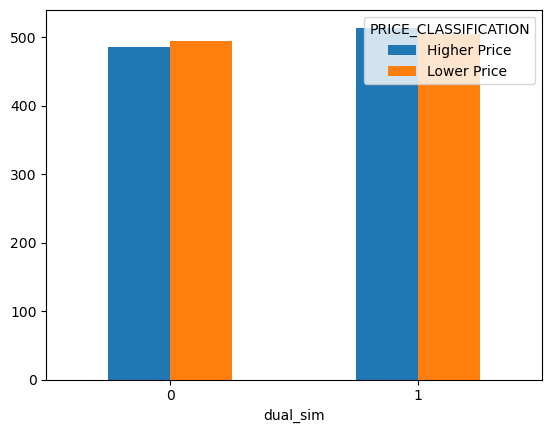

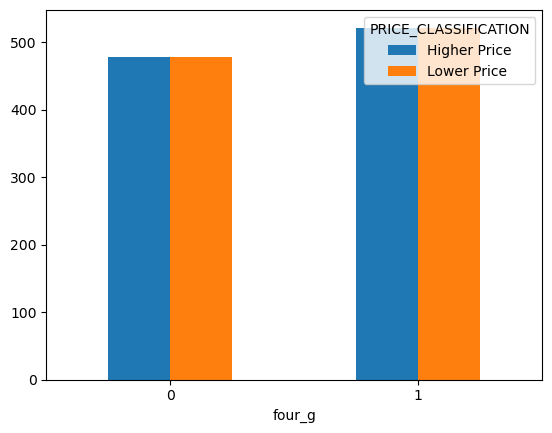

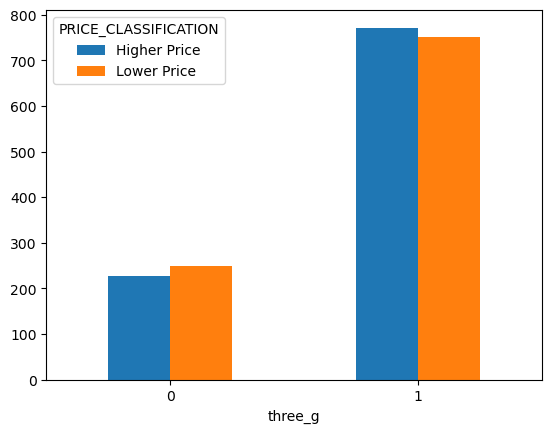

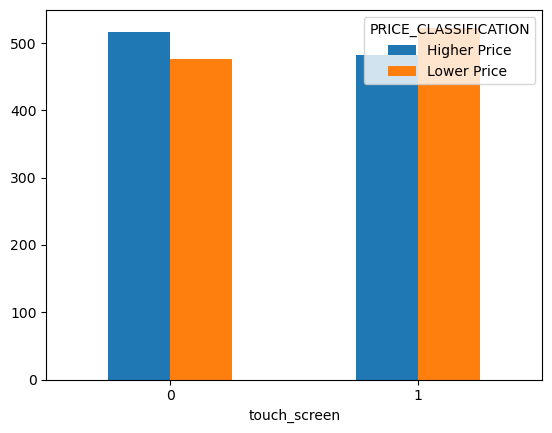

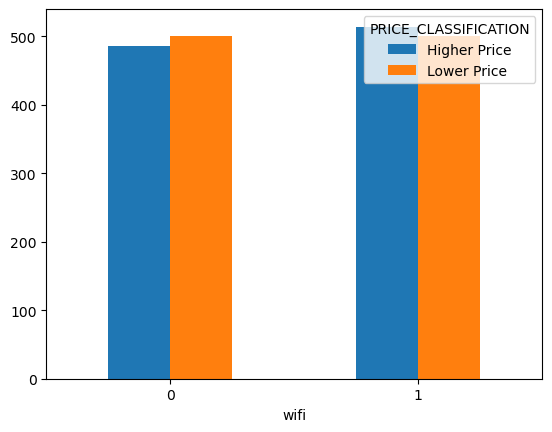

In [16]:
for col in cat_cols:
    counts = df_eda.groupby(col)['PRICE_CLASSIFICATION'].value_counts().unstack()
    counts.plot(kind='bar', rot = 0)
    plt.show()

As seen from visualization above we know that:

- `Bluetooth` doesn't have that significant in price significancy as either phones that have `bluetooth` or not have more or less the same popularity.

- `Dual Sim` also doesn't have that significant in price significancy as either phones that have `Dual Sim` or not have more or less the same popularity.

- `4G` also doesn't have that significant in price significancy as either phones that have `4G` or not have more or less the same popularity.

- `3G` have significant role in price significancy as phones that have `3G` are more popular than phones that doesn't have 3G.

- `Touch Screen` doesn't have that significant in price significancy as either phones that have `Touch Screen` or not have more or less the same popularity.

- `Wifi` doesn't have that significant in price significancy as either phones that have `Wifi` or not have more or less the same popularity.

<Axes: xlabel='ram', ylabel='price_range'>

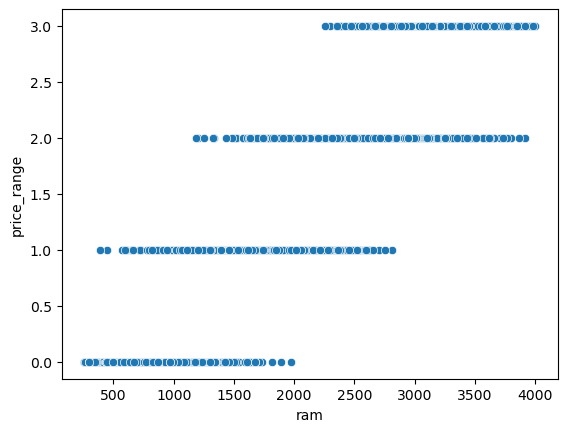

In [17]:
sns.scatterplot(data=df, x="ram", y="price_range")

As seen above that ram have direct correlation to price range.

----

# Feature Engineering

In Feature Engineering we will doing a Test and Load with Train and Test between X and y.

In [18]:
#Splot Between Features and Target
X = df.drop(['price_range'],axis=1) #Features
y = df['price_range'] #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (2000, 20) (2000,) 
Training set  --->  (1600, 20) (1600,) 
Testing set   --->  (400, 20)  (400,)


In [19]:
# check skewness
for i in X_train.columns:
    print(i, ': ', X[i].skew())

battery_power :  0.03189847179278164
blue :  0.020016015215014945
clock_speed :  0.1780841202790887
dual_sim :  -0.03803539334775485
fc :  1.0198114105315519
four_g :  -0.08614423907054716
int_memory :  0.05788932785206039
m_dep :  0.08908200979245855
mobile_wt :  0.006558157428692449
n_cores :  0.0036275083137803994
pc :  0.017306150471392553
px_height :  0.6662712560691598
px_width :  0.014787473768006081
ram :  0.006628035398750348
sc_h :  -0.09888424098283438
sc_w :  0.6337870734456067
talk_time :  0.009511762221541457
three_g :  -1.2281416344153246
touch_screen :  -0.012009224801531652
wifi :  -0.028023766608637157


# Feature Selection

In feature selection we will select top 5 features that will be used for modeling

In [20]:
# Use SelectKBest to select top 5 features based on mutual information
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()].tolist()

# Get the mutual information scores for each feature
scores = selector.scores_

# Create a pandas dataframe to store the mutual information scores for each feature
scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': scores})

# Sort the dataframe by mutual information score in descending order
scores_df = scores_df.sort_values(by='Mutual Information Score', ascending=False)

# Filter the dataframe to show only the selected features
selected_scores_df = scores_df[scores_df['Feature'].isin(selected_features)]

print('Mutual information scores for each feature:')
print(scores_df)

Mutual information scores for each feature:
          Feature  Mutual Information Score
13            ram                  0.849059
6      int_memory                  0.038948
10             pc                  0.029260
1            blue                  0.028736
12       px_width                  0.027607
11      px_height                  0.025041
0   battery_power                  0.024655
19           wifi                  0.023611
4              fc                  0.017576
5          four_g                  0.005151
15           sc_w                  0.004996
8       mobile_wt                  0.004892
3        dual_sim                  0.004624
7           m_dep                  0.000000
9         n_cores                  0.000000
2     clock_speed                  0.000000
14           sc_h                  0.000000
16      talk_time                  0.000000
17        three_g                  0.000000
18   touch_screen                  0.000000


In [21]:
# Use SelectKBest to select top 5 features based on mutual information
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()].tolist()

# Get the mutual information scores for each feature
scores = selector.scores_

# Create a pandas dataframe to store the mutual information scores for each feature
scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': scores})

# Sort the dataframe by mutual information score in descending order
scores_df = scores_df.sort_values(by='Mutual Information Score', ascending=False)

# Filter the dataframe to show only the selected features
selected_scores_df = scores_df[scores_df['Feature'].isin(selected_features)]

print('Mutual information scores for each feature:')
print(scores_df)
print('\nSelected features and their mutual information scores:')
print(selected_scores_df)

Mutual information scores for each feature:
          Feature  Mutual Information Score
13            ram               3520.110824
0   battery_power                 31.598158
12       px_width                 22.620882
11      px_height                 19.484842
8       mobile_wt                  3.594318
6      int_memory                  2.922996
9         n_cores                  2.625415
14           sc_h                  2.225984
15           sc_w                  1.671000
16      talk_time                  1.628811
7           m_dep                  1.500682
18   touch_screen                  1.293302
5          four_g                  1.059525
10             pc                  0.825446
4              fc                  0.772182
2     clock_speed                  0.493708
1            blue                  0.476768
17        three_g                  0.457320
3        dual_sim                  0.428239
19           wifi                  0.284940

Selected features and their mut

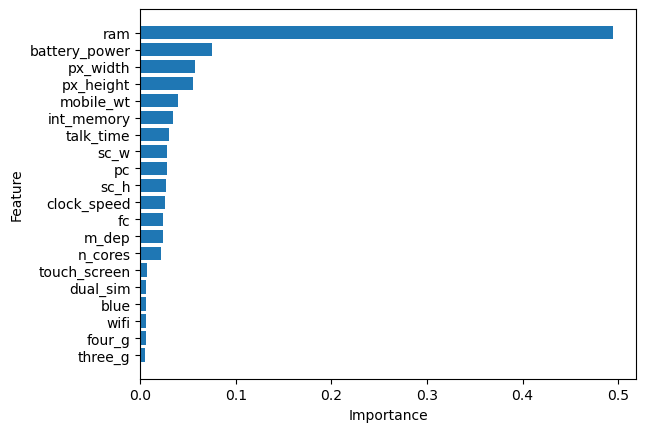

In [22]:
# Train a Random Forest Classifier on the dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Get the column names from the original dataset
df3 = pd.DataFrame(X, columns=X.columns)

# Create a dictionary mapping feature indices to names
feature_dict = dict(zip(range(X.shape[1]), df.columns))

# Sort feature importances in descending order
importances_sorted, indices_sorted = zip(*sorted(zip(importances, range(X.shape[1])), reverse=False))

# Plot feature importances using a horizontal bar chart
plt.barh(range(X.shape[1]), importances_sorted, align='center')
plt.yticks(range(X.shape[1]), [feature_dict[i] for i in indices_sorted])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


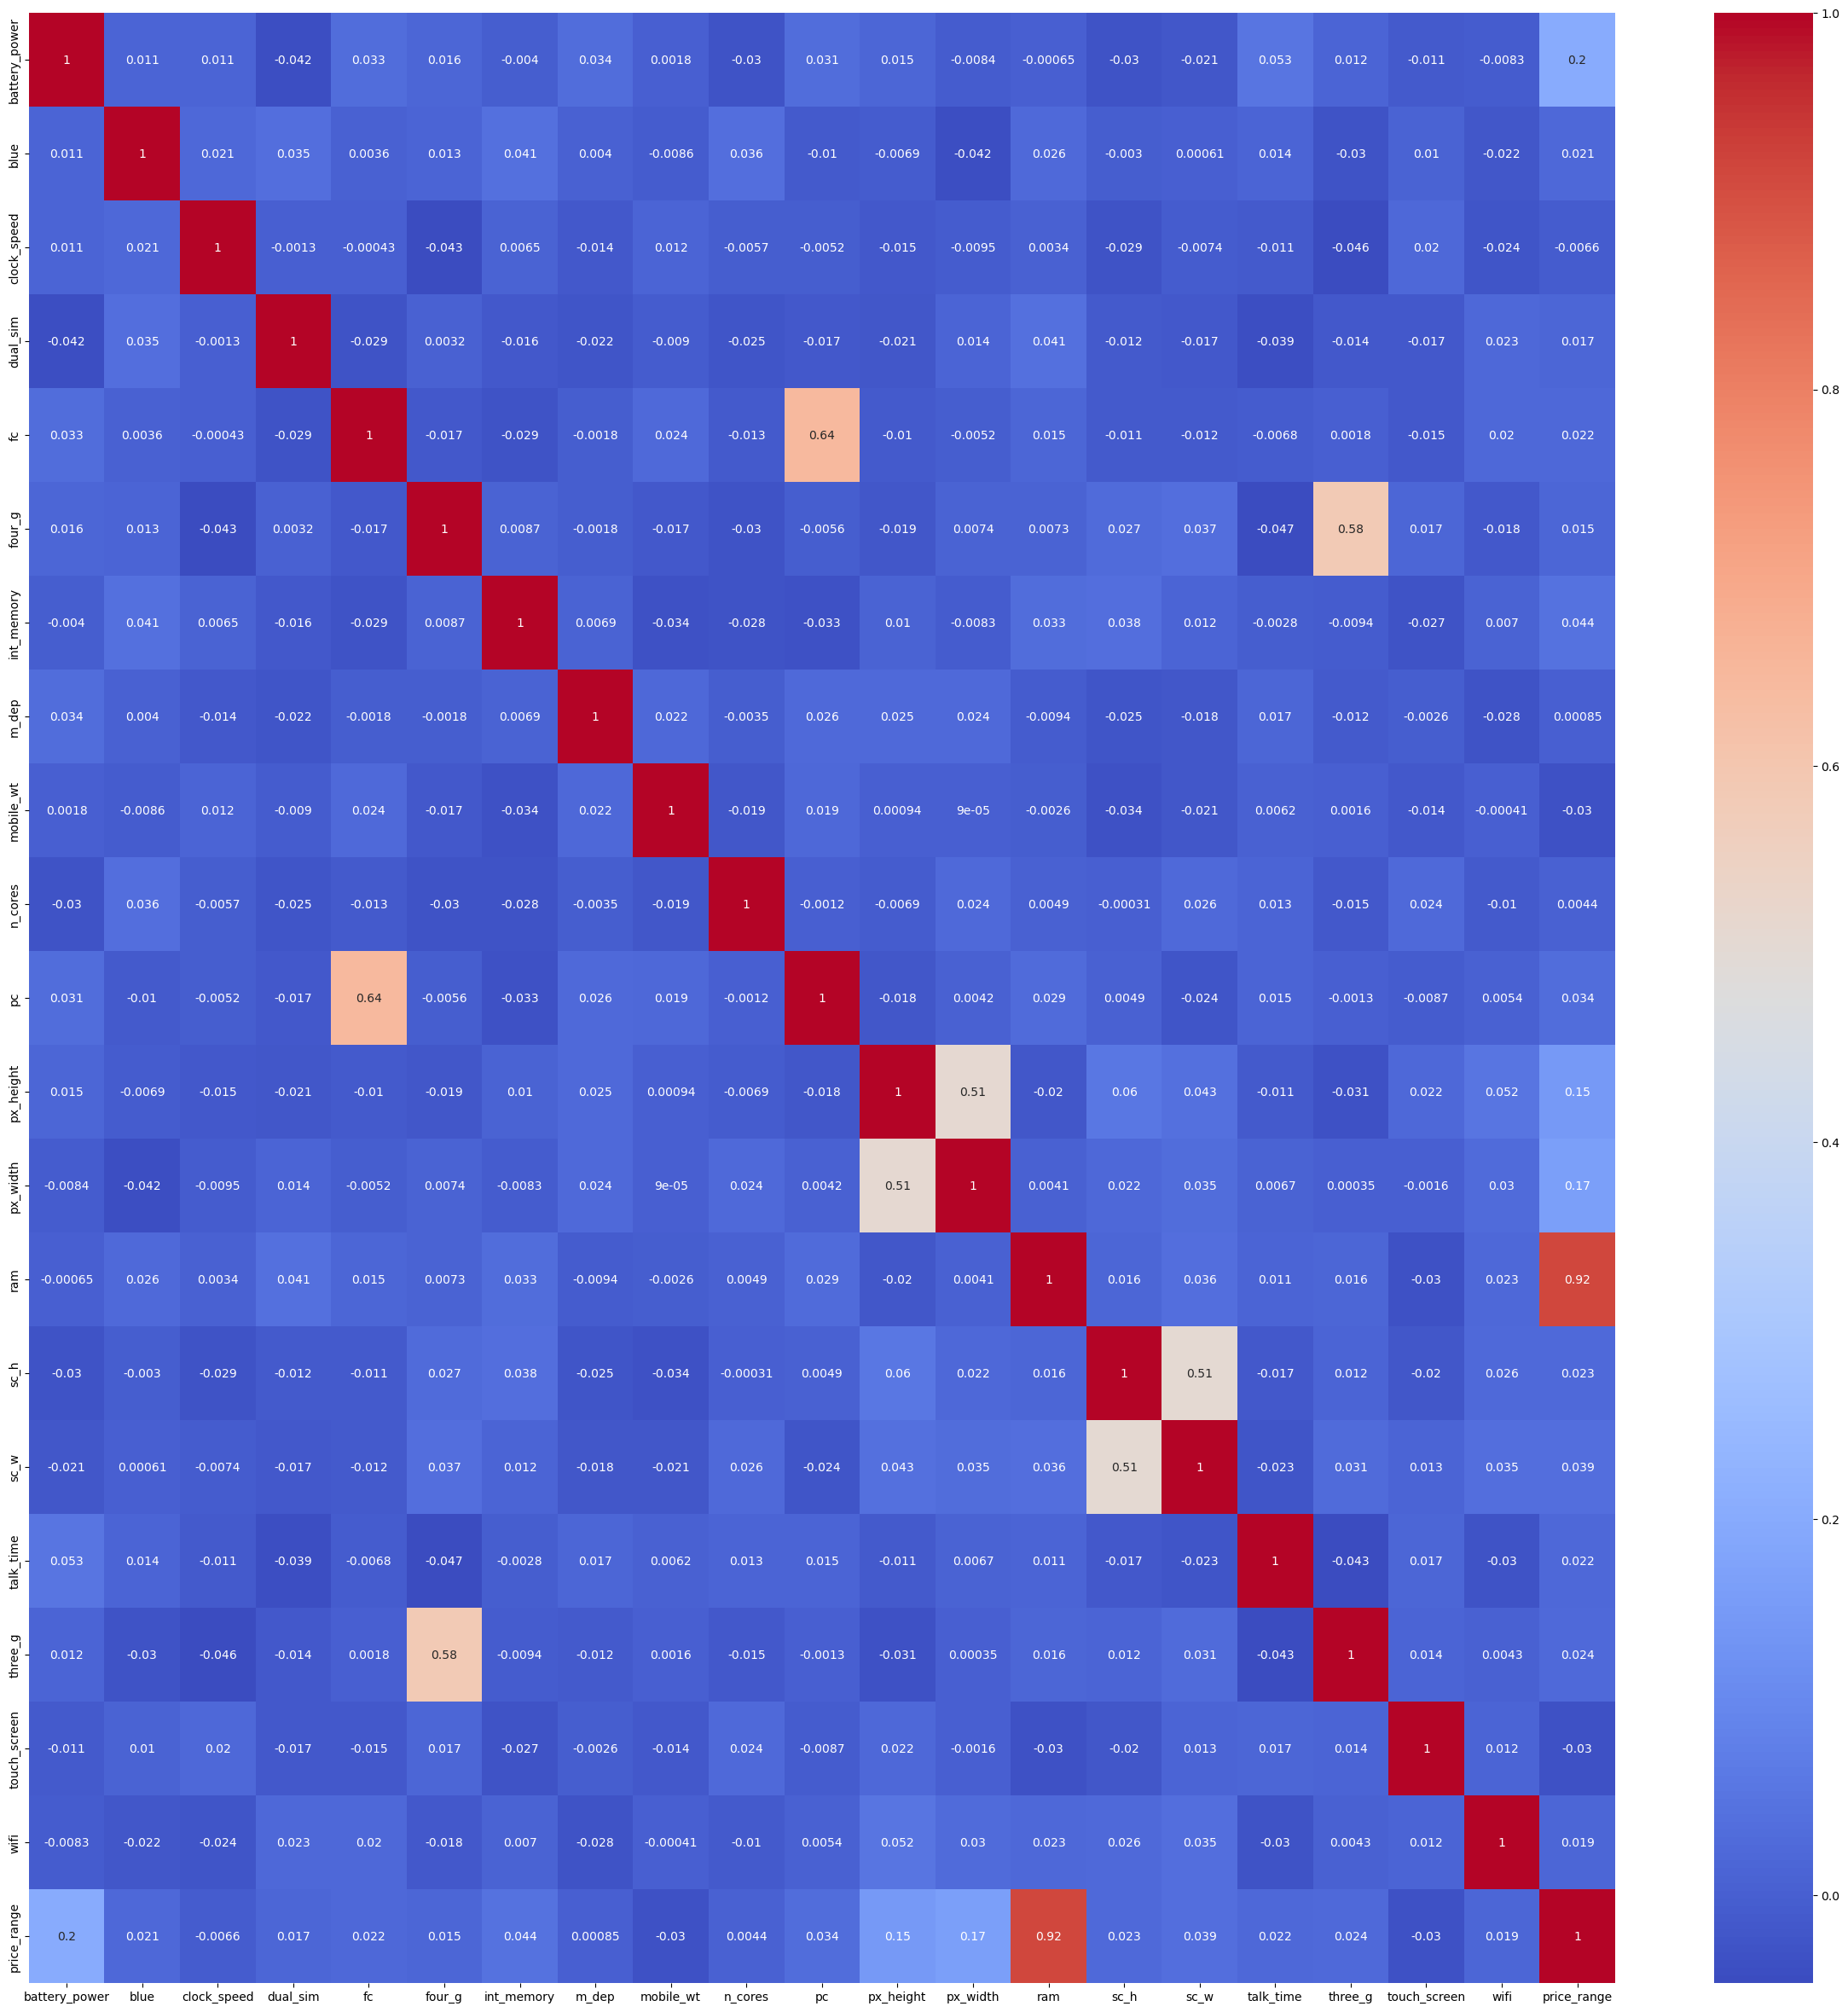

In [23]:
fig, axes = plt.subplots(figsize=(30,30)) #Width, height in inches
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

As seen above 4 Feature Selection method, we finally selected 5 top features that appear many times in 4 features selection above.

In [24]:
selected_features = ['ram','battery_power','px_width','px_height','int_memory']

In [25]:
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

In [26]:
X_train_new.skew()

ram              0.011653
battery_power    0.046393
px_width         0.029990
px_height        0.650582
int_memory       0.055464
dtype: float64

----

# Model Definition

In this Modeling we will use 8 kind of Models that are:

- Logistik Regresi

- Decission Tree Classifier

- Support Vector Machine

- Random Forest Classifier

- Gaussian Naive Bayes

- KNeighbors Classifier

- Adaptive Boost Classifier

- XGBoost

In [27]:
models = [LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), SVC(random_state=42), RandomForestClassifier(random_state=42),
          GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier(random_state=42), xgb.XGBClassifier(random_state=42)]

# Model Training

Modeling are done using Pipeline method

In [28]:
# define the preprocessing steps for categorical and numerical columns
num_pipeline_ss = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])

num_pipeline_mm_1 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
        ("num_ss", num_pipeline_ss, ['ram','battery_power','px_width','int_memory']),
        ("num_mm_1", num_pipeline_mm_1, ['px_height'])
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, and adaboost.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', None)
])

# define the models to be applied in the pipeline
models = [LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), SVC(random_state=42), RandomForestClassifier(random_state=42),
          GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier(random_state=42), xgb.XGBClassifier(random_state=42)]

# prepare the cross-validation procedure
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# train and evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score
for model in models:
    pipeline.set_params(classifier=model)
    scores_train = cross_val_score(pipeline, X_train_new, y_train, cv=skf, scoring='accuracy')
    scores_test = cross_val_score(pipeline, X_test_new, y_test, cv=skf, scoring='accuracy')
    print(f'{type(model).__name__} Train Accuracy: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')
    print(f'{type(model).__name__} Test Accuracy: {scores_test.mean():.3f} (+/- {scores_test.std():.3f})')

LogisticRegression Train Accuracy: 0.931 (+/- 0.015)
LogisticRegression Test Accuracy: 0.940 (+/- 0.031)
DecisionTreeClassifier Train Accuracy: 0.841 (+/- 0.017)
DecisionTreeClassifier Test Accuracy: 0.790 (+/- 0.035)
SVC Train Accuracy: 0.918 (+/- 0.012)
SVC Test Accuracy: 0.918 (+/- 0.024)
RandomForestClassifier Train Accuracy: 0.904 (+/- 0.029)
RandomForestClassifier Test Accuracy: 0.865 (+/- 0.028)
GaussianNB Train Accuracy: 0.793 (+/- 0.029)
GaussianNB Test Accuracy: 0.795 (+/- 0.020)
KNeighborsClassifier Train Accuracy: 0.846 (+/- 0.013)
KNeighborsClassifier Test Accuracy: 0.820 (+/- 0.049)
AdaBoostClassifier Train Accuracy: 0.687 (+/- 0.056)
AdaBoostClassifier Test Accuracy: 0.525 (+/- 0.146)
XGBClassifier Train Accuracy: 0.906 (+/- 0.018)
XGBClassifier Test Accuracy: 0.885 (+/- 0.029)


Score above are train and test accuracy from many models. Higher score have a better result. However this score is not yet the best result as we will have tot Hyperparameter tuning it for better and improved result.

----

### Hyperparameter Tuning

Hyperparameter Tuning are a model improvement method using GridSearchCV that tuning each models and have it search the best parameter for each models.

In [29]:
# create a dictionary of hyperparameters for each model
logreg_params = {'classifier__solver':['lbfgs','liblinier'],
                 'classifier__penalty': ['l1', 'l2'], 
                 'classifier__C': [0.01, 0.1, 1, 10, 100],
                 'classifier__random_state': [42]}

dt_params = {'classifier__criterion': ['gini', 'entropy'], 
             'classifier__max_depth': [5, 10, 15, 20, None],
             'classifier__min_samples_split': [2, 5, 10, 15],
             'classifier__random_state': [42]}

svm_params = {'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__kernel': ['linear', 'rbf','poly'],
              'classifier__gamma': [0.1, 1, 10],
              'classifier__random_state': [42]}

rf_params = {'classifier__n_estimators': [100, 300],
             'classifier__max_depth': [5, 10, 15, 20],
             'classifier__min_samples_split': [2, 5, 10, 15],
             'classifier__max_features': ['auto', 'sqrt'],
             'classifier__random_state': [42]}

nb_params = {}

knn_params = {'classifier__n_neighbors': [5, 10, 15, 20], 
              'classifier__weights': ['uniform', 'distance'],
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

ada_params = {'classifier__n_estimators': [50, 100, 150], 
              'classifier__learning_rate': [0.01, 0.1, 1, 10],
              'classifier__random_state': [42]}

XGBoost_params = {'classifier__max_depth': [5, 10, 15], 
              'classifier__learning_rate': [0.01, 0.1, 1, 10],
              'classifier__random_state': [100]}

# create a dictionary of hyperparameters for each model
param_grid = {
    'LogisticRegression': logreg_params,
    'DecisionTreeClassifier': dt_params,
    'SVM': svm_params,
    'RandomForestClassifier': rf_params,
    'GaussianNB': nb_params,
    'KNeighborsClassifier': knn_params,
    'AdaBoostClassifier': ada_params,
    'XGBoostClassifier': XGBoost_params,
}

# create a dictionary of models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBoostClassifier': xgb.XGBClassifier(),
}


# prepare the cross-validation procedure
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# loop through each model and its corresponding hyperparameters to perform grid search cross-validation
for model_name, model in models.items():
    pipeline.set_params(classifier=model)
    if model_name in param_grid:
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=skf,scoring='accuracy')
        grid_search.fit(X_train_new, y_train)
        print(f'{model_name} Best Parameters: {grid_search.best_params_}')
        print(f'{model_name} Best Score: {grid_search.best_score_}')
        print(f'{model_name} Accuracy Score: {grid_search.cv_results_["mean_test_score"].mean()}')

LogisticRegression Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__random_state': 42, 'classifier__solver': 'lbfgs'}
LogisticRegression Best Score: 0.9556250000000001
LogisticRegression Accuracy Score: nan
DecisionTreeClassifier Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__random_state': 42}
DecisionTreeClassifier Best Score: 0.8487500000000001
DecisionTreeClassifier Accuracy Score: 0.8384687500000002
SVM Best Parameters: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'linear', 'classifier__random_state': 42}
SVM Best Score: 0.9556250000000001
SVM Accuracy Score: 0.8778194444444446
RandomForestClassifier Best Parameters: {'classifier__max_depth': 15, 'classifier__max_features': 'auto', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300, 'classifier__random_state': 42}
RandomForestClassifier Best Score: 0.9043750000000002
Rando

As seen above we have a significant improvement of Support Vector Machine from 9.1 to 9.5 of best score. 

----

### Best Parameter Training Model

As SVM model that have the best score we will use it for modeling. 

In [37]:
# define the preprocessing steps for categorical and numerical columns
num_pipeline_ss = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])

num_pipeline_mm_1 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
        ("num_ss", num_pipeline_ss, ['ram','battery_power','px_width','int_memory']),
        ("num_mm_1", num_pipeline_mm_1, ['px_height'])
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, and adaboost.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', None)
])

# define the models to be applied in the pipeline
models = [SVC(C = 50, gamma=0.1, kernel='linear', random_state=42)]

# prepare the cross-validation procedure
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# train and evaluate each model using cross-validation
for model in models:
    pipeline.set_params(classifier=model)
    scores_train = cross_val_score(pipeline, X_train_new, y_train, cv=skf, scoring='accuracy')
    scores_test = cross_val_score(pipeline, X_test_new, y_test, cv=skf, scoring='accuracy')
    print(f'{type(model).__name__} Train Accuracy: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')
    print(f'{type(model).__name__} Test Accuracy: {scores_test.mean():.3f} (+/- {scores_test.std():.3f})')

SVC Train Accuracy: 0.956 (+/- 0.010)
SVC Test Accuracy: 0.958 (+/- 0.017)


In [38]:
# define the preprocessing steps for categorical and numerical columns
num_pipeline_ss = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])

num_pipeline_mm_1 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
        ("num_ss", num_pipeline_ss, ['ram','battery_power','px_width','int_memory']),
        ("num_mm_1", num_pipeline_mm_1, ['px_height'])
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, and adaboost.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', None)
])

# define the models to be applied in the pipeline
models = [LogisticRegression(C = 50, penalty='l2', solver='lbfgs', random_state=42)]

# prepare the cross-validation procedure
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# train and evaluate each model using cross-validation
for model in models:
    pipeline.set_params(classifier=model)
    scores_train = cross_val_score(pipeline, X_train_new, y_train, cv=skf, scoring='accuracy')
    scores_test = cross_val_score(pipeline, X_test_new, y_test, cv=skf, scoring='accuracy')
    print(f'{type(model).__name__} Train Accuracy: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')
    print(f'{type(model).__name__} Test Accuracy: {scores_test.mean():.3f} (+/- {scores_test.std():.3f})')

LogisticRegression Train Accuracy: 0.956 (+/- 0.011)
LogisticRegression Test Accuracy: 0.963 (+/- 0.016)


As seen above that the accuracy of the model are around 0.95 and also goodfit.

In this SVC Model we use C = 50 , gamma = 0.1, kernel = 'linear', and random_state = 42.

C is a hyperparameter that controls the trade-off between maximizing the margin and minimizing the classification error on the training data. A smaller value of C creates a wider margin at the expense of misclassifying some of the training examples, while a larger value of C creates a narrower margin that is more focused on correctly classifying all the training examples.

Gamma: Gamma is a hyperparameter that controls the shape of the decision boundary. It defines the influence of each training example on the decision boundary. A smaller value of gamma makes the decision boundary more spread out, while a larger value of gamma makes the decision boundary more focused around the training examples.

Kernel 'linear': A kernel is a function that maps the original feature space to a higher dimensional feature space where the data may be more separable. In SVM, 'linear' is a type of kernel that creates a linear decision boundary in the original feature space.

Random state: Random state is a parameter used to initialize the random number generator used by the SVM algorithm. Setting a fixed random state ensures that the results are reproducible across multiple runs of the algorithm.

Source: Scikit-Documentation.

----

# Model Evaluation

In evaluating this model, the classification report will be used as an evaluation medium.

In this case, the classification report is a report that presents the evaluation results of the classification performance model on the test data set. This report contains several evaluation metrics, such as accuracy, precision, recall, and f1-score, which can help us understand how well our model classifies data.

This metric is useful in evaluating performance classification models and can help identify areas for improvement. In general, a good model will have high precision, recall and F1 scores across all classes.

As for this analysis we will using a f1-score because the objective of this analysis are only for price analysis.


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.95      0.96      0.96       400
           2       0.94      0.94      0.94       400
           3       0.97      0.96      0.96       400

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.97      0.97      0.97       100
           2       0.95      0.95      0.95       100
           3       0.98      0.97      0.97       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



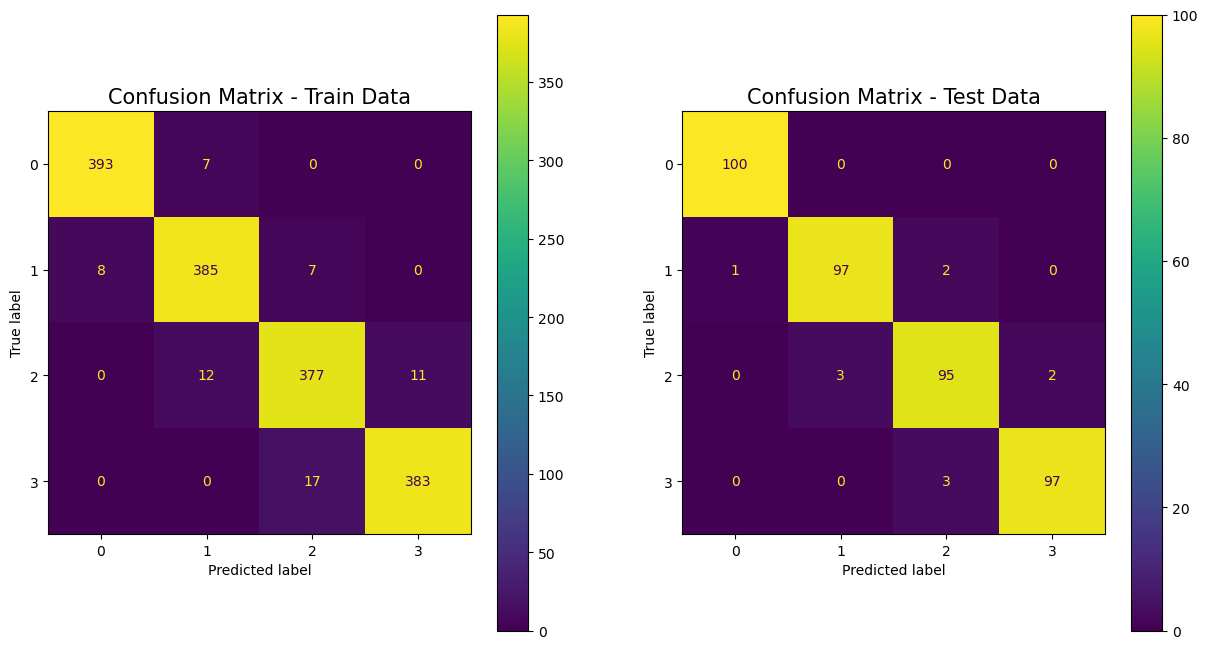

In [31]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline.set_params(classifier=SVC(C = 50, gamma=0.1, kernel='linear', random_state=42))
pipeline.fit(X_train_new, y_train)

# make predictions on the test data
y_pred1 = pipeline.predict(X_train_new)

# make predictions on the test data
y_pred2 = pipeline.predict(X_test_new)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train)
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train)
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

As seen above we got the f1-score of average test that are around 0.97 or about 97% prediction accuracy.

----

### Model Final

This is the final model that will be used for Model Inference and Model Deployment.

In [32]:
# define the preprocessing steps for categorical and numerical columns
num_pipeline_ss = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])

num_pipeline_mm_1 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
        ("num_ss", num_pipeline_ss, ['ram','battery_power','px_width','int_memory']),
        ("num_mm_1", num_pipeline_mm_1, ['px_height'])
])

# create the pipeline to apply support vector machine
SVC_Model = Pipeline([
    ("preprocess", preprocessor),
    ("classification", SVC(C = 50, gamma=0.1, kernel='linear', random_state=42))
])

#Evaluate the Final Pipeline Accuracy
SVC_Model.fit(X_train, y_train)
hasil = SVC_Model.predict(X_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.97      0.97      0.97       100
           2       0.95      0.95      0.95       100
           3       0.98      0.97      0.97       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



----

# Model Saving

To save the model, simply import joblib and use joblib.dump(variable name,'filename.pkl'). In order to be able to do modeling on different notebooks/files, we will save the model, scaling, and encoder that have been fit.

In [33]:
joblib.dump(num_pipeline_ss,'num_pipeline_ss.pkl')
joblib.dump(num_pipeline_mm_1,'num_pipeline_mm_1.pkl')
joblib.dump(preprocessor,'preprocessor.pkl')
joblib.dump(SVC_Model,'SVC_Model.pkl')

['SVC_Model.pkl']

----

# Model Inference

Done on a separate Notebook

----

# Conclusion

## Model Analysis

The model that i build for mobile price prediction have an accuracy of 97% that used Support Vector Machine as the model.

it's very accurate for standard modeling.

## Overall Analysis

The conclusion that we can take is that we can predict the mobile price range using the model that we build from Support Vector Machine that have an accuracy of 97%.